<a href="https://colab.research.google.com/github/Milind-Ranjan/Stock-Predictor/blob/main/Stock_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

In [64]:
START = "2013-01-02"
TODAY = date.today().strftime("%Y-%m-%d")
def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [65]:
data = load_data('Google_Stock')
df=data
df.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.373960,212818400
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,23.687311,257142000
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,23.689539,263188400
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.021713,160423600
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,24.944683,237458000


In [66]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,27.847500,27.860001,26.837500,27.332500,212818400
1,27.072500,27.162500,26.352501,26.562500,257142000
2,26.635000,26.857500,26.157499,26.565001,263188400
3,26.799999,27.049999,26.674999,26.937500,160423600
4,27.307501,28.037500,27.174999,27.972500,237458000


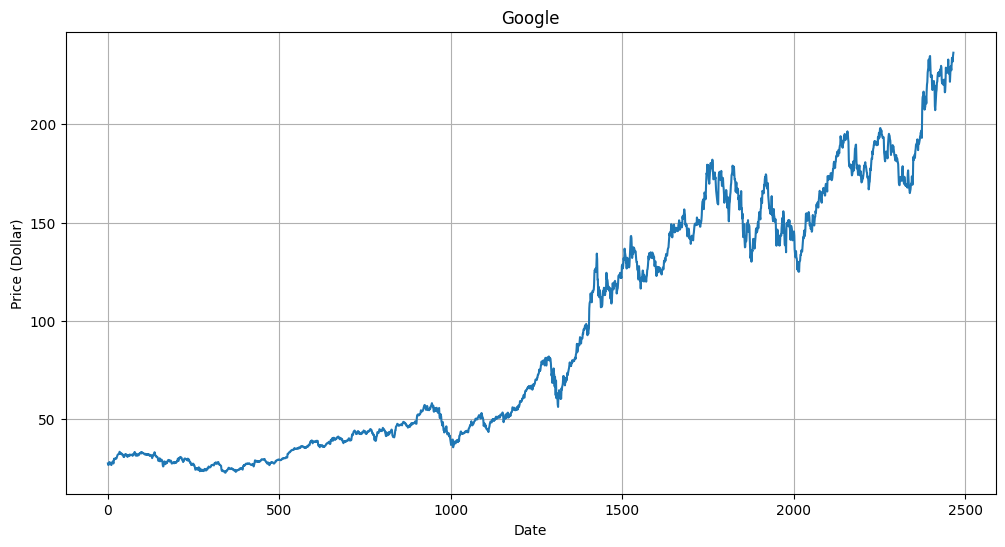

In [67]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("Google")
plt.xlabel("Date")
plt.ylabel("Price (Dollar)")
plt.grid(True)
plt.show()

In [68]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(1726, 7)
(741, 7)


In [69]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.373960,212818400
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,23.687311,257142000
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,23.689539,263188400
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.021713,160423600
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,24.944683,237458000


In [70]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1726,2021-11-09,150.199997,151.429993,150.059998,150.809998,148.542679,56787900
1727,2021-11-10,150.020004,150.130005,147.850006,147.919998,145.696152,65187100
1728,2021-11-11,148.960007,149.429993,147.679993,147.869995,145.646851,41000000
1729,2021-11-12,148.429993,150.399994,147.479996,149.990005,147.735016,63804000
1730,2021-11-15,150.369995,151.880005,149.429993,150.000000,147.744873,59222800


In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.03540137],
       [0.0296596 ],
       [0.02967825],
       ...,
       [0.95727232],
       [0.95965845],
       [0.95339473]])

In [72]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [73]:
x_train.shape

(1626, 100, 1)

In [74]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [115]:
# Define the LSTM model
model = Sequential()

# 1st LSTM Layer
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))  # 20% dropout to prevent overfitting

# 2nd LSTM Layer
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

# 3rd LSTM Layer
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

# 4th LSTM Layer
model.add(LSTM(units=50, activation='relu'))
model.add(Dropout(0.2))

# Output Layer (Predicting the next stock price)
model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [116]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                       │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_17 (LSTM)                       │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_18 (LSTM)                       │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_19 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

In [119]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 15s 125ms/step - loss: 0.0879 - mean_absolute_error: 0.1985
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0085 - mean_absolute_error: 0.0630
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0050 - mean_absolute_error: 0.0432
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0047 - mean_absolute_error: 0.0426
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0057 - mean_absolute_error: 0.0459
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0040 - mean_absolute_error: 0.0387
Epoch 7/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0041 - mean_absolute_error: 0.0409
Epoch 8/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0041 - mean_absolute_error: 0.0397
Epoch 9/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0035 - mean_absolute_error: 0.0368
Epoch 10/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0032 - mean_absolute_error: 0.0357
Epoch 11/100
51/51 ━━━━━━━━

In [120]:
model.save('keras_model.h5')

In [121]:
test_close.shape

past_100_days = pd.DataFrame(train_close[-100:])
test_df = pd.DataFrame(test_close)

In [122]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [123]:
input_data = scaler.fit_transform(final_df)

In [124]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [125]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(741, 100, 1)
(741,)


In [126]:
# Making predictions

y_pred = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step


In [127]:
y_test

array([2.31383466e-01, 2.05454887e-01, 2.05006268e-01, 2.24026638e-01,
       2.24116307e-01, 2.33088135e-01, 2.55428038e-01, 2.94724554e-01,
       3.18769125e-01, 3.22985896e-01, 3.26484903e-01, 3.31239961e-01,
       2.85214437e-01, 3.15987880e-01, 3.61385311e-01, 3.56630253e-01,
       3.47568618e-01, 3.30342724e-01, 3.61564786e-01, 4.14139569e-01,
       4.49129783e-01, 4.44464394e-01, 4.88336630e-01, 4.55051223e-01,
       4.42400911e-01, 4.86990910e-01, 4.23829161e-01, 4.13780757e-01,
       4.01309920e-01, 4.30378694e-01, 4.54153985e-01, 4.59895950e-01,
       4.96231883e-01, 4.86901104e-01, 4.87708673e-01, 4.77121844e-01,
       4.71469685e-01, 5.11304489e-01, 4.90579587e-01, 4.47694257e-01,
       4.21496535e-01, 4.23021729e-01, 4.23201204e-01, 4.49129783e-01,
       4.53167078e-01, 4.23201204e-01, 4.31096457e-01, 4.01758539e-01,
       3.69729046e-01, 3.54297490e-01, 3.35456732e-01, 3.28368911e-01,
       3.11860779e-01, 3.11053347e-01, 3.06836577e-01, 4.06513597e-01,
      

In [128]:
scaler.scale_

array([0.00897183])

In [129]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

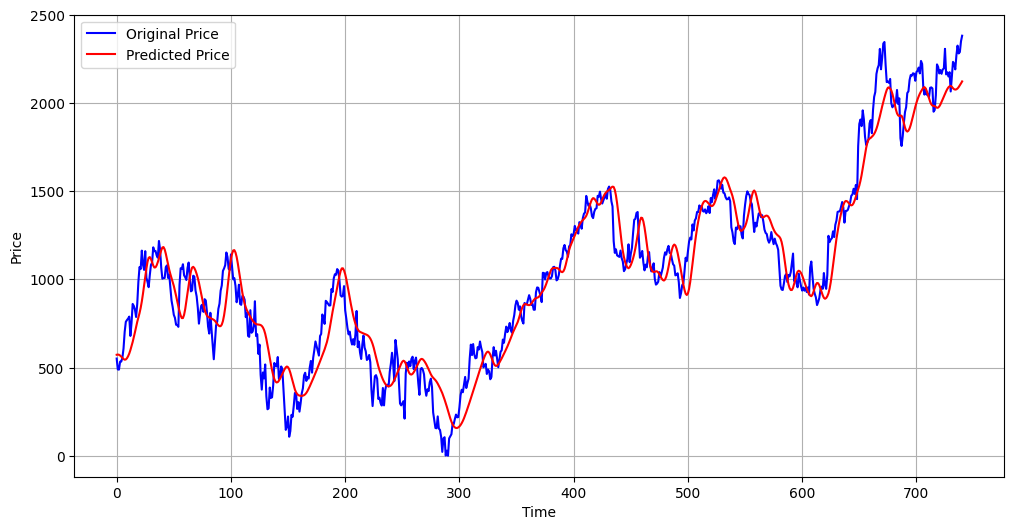

In [130]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [131]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 10.78%


In [132]:
from sklearn.metrics import r2_score
actual = y_test
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.928828446448546


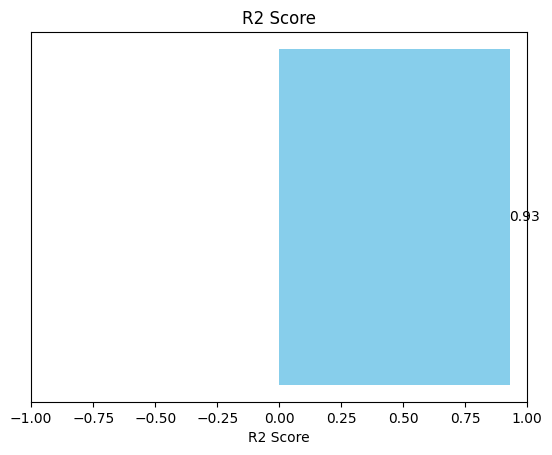

In [133]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')
plt.show()

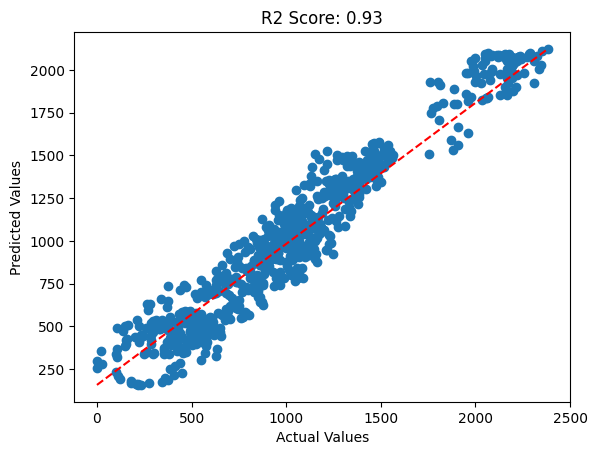

In [134]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()